# Flight Price Prediction

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [60]:
import pandas as pd

In [61]:
df1 = pd.read_excel('Data_Train.xlsx')

In [62]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [63]:
df2 = pd.read_excel('Test_set.xlsx')

In [64]:
df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [65]:
pd.set_option('display.max_columns',None)# to display all the columns


In [66]:
df1.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


No null values present in the data

In [70]:
df1["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
30h 25m      1
31h 30m      1
47h 40m      1
27h 55m      1
32h 55m      1
Name: Duration, Length: 368, dtype: int64

In [71]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is one NaN value presernt in the data in Additional_Info

In [72]:
df1.dropna(inplace=True)# dropping the NaN value

In [73]:
df1.isnull().sum()# removed NaN values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA

In [74]:
#extracting the data from the date column
df1['day'] = pd.to_datetime(df1.Date_of_Journey,format="%d/%m/%Y").dt.day
df1['month']= pd.to_datetime(df1.Date_of_Journey,format="%d/%m/%Y").dt.month
df1['year']= pd.to_datetime(df1.Date_of_Journey,format="%d/%m/%Y").dt.year

In [75]:
df1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [76]:
df1['year'].nunique()

1

In [77]:
df1.drop(["Date_of_Journey"],axis=1,inplace=True)

In [78]:
df1.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019


In [79]:
#extracting the data from Dep_time column
df1["Dep_hour"]=pd.to_datetime(df1["Dep_Time"]).dt.hour
df1["Dep_min"]=pd.to_datetime(df1["Dep_Time"]).dt.minute
df1.drop(["Dep_Time"], axis =1, inplace=True)

In [80]:
df1.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [81]:
#extracting the data from Arrival_hour column
df1["Arrival_hour"]=pd.to_datetime(df1.Arrival_Time).dt.hour
df1["Arrival_min"]=pd.to_datetime(df1.Arrival_Time).dt.minute
df1.drop(["Arrival_Time"], axis=1, inplace= True)

In [82]:
df1.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [83]:
#we are splitting Hour and minute in duration column
duration1 = list(df1["Duration"])
for i in range(len(duration1)):
    if (len(duration1[i].split())) != 2:
        if "h" in duration1[i]:
            duration1[i] = duration1[i].strip() + " 0m"
        else:
            duration1[i] = "0h " + duration1[i]
dur_hours = []
dur_mins =[]
for i in range(len(duration1)):
    dur_hours.append(int(duration1[i].split(sep = "h")[0]))
    dur_mins.append(int(duration1[i].split(sep = "m")[0].split()[-1]))

In [84]:
df1["Dur_hour"] = dur_hours
df1["Dur_mins"] = dur_mins

In [85]:
df1.drop(["Duration"],axis=1,inplace=True)

In [86]:
df1.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_hour,Dur_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [87]:
import matplotlib.pyplot as plt

In [88]:
import seaborn as sns

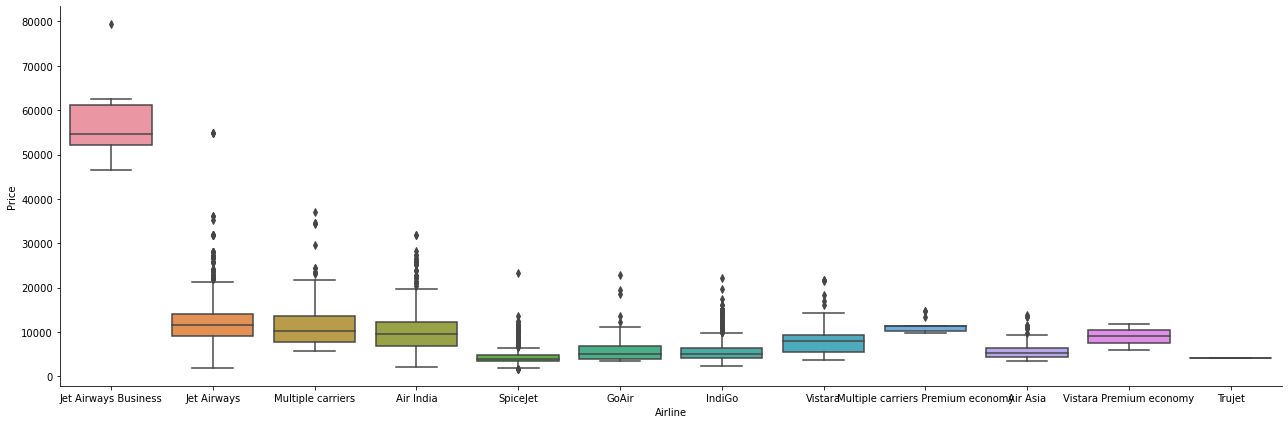

In [89]:
sns.catplot(y="Price", x="Airline", data =df1.sort_values("Price", ascending = False), kind = "box", height=6, aspect = 3 )
plt.show()

jet airways hava more ticket price

In [90]:
Airline = df1[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [91]:
df1["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

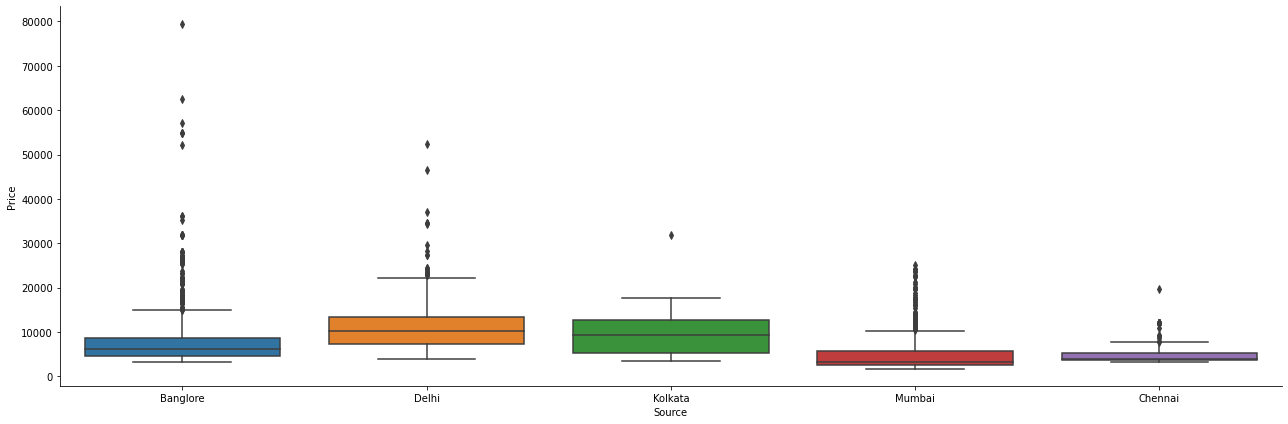

In [92]:
sns.catplot(x="Source",y="Price", data =df1.sort_values("Price", ascending = False), kind = "box", height=6, aspect = 3 )
plt.show()

almost all the places have same price except Bangalore have more outliers

In [93]:
df1.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_hour,Dur_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50


In [94]:
Source = df1[["Source"]]

Source = pd.get_dummies(Source, drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [95]:
df1["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [96]:
dest = df1[["Destination"]]
dest = pd.get_dummies(dest,drop_first = True)
dest.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [97]:
df1.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [98]:
df1["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [99]:
df1.replace({"non-stop": 0, "1 stop": 1, "2 stops":2, "3 stops":3, "4 stops": 4}, inplace = True)

In [100]:
df1 = pd.concat([df1, Airline, Source, dest], axis = 1)

In [101]:

df1.drop(["Airline", "Source","Destination"], axis = 1, inplace = True)

In [102]:
df1.head(5)

,Total_Stops,Price,day,month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_hour,Dur_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [103]:
df1.shape

(10682, 31)

# test data

In [104]:
df2.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [106]:
df2["Duration"].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
19h 45m      1
38h 35m      1
20h 25m      1
27h 50m      1
32h 20m      1
Name: Duration, Length: 320, dtype: int64

In [107]:
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [108]:
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

## EDA

In [109]:
df2['day'] = pd.to_datetime(df2.Date_of_Journey,format="%d/%m/%Y").dt.day
df2['month']= pd.to_datetime(df2.Date_of_Journey,format="%d/%m/%Y").dt.month
df2['year']= pd.to_datetime(df2.Date_of_Journey,format="%d/%m/%Y").dt.year

In [110]:
df2['year'].nunique()

1

In [111]:
df2.drop(["Date_of_Journey"],axis=1,inplace=True)

In [112]:
df2.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019


In [113]:
df2["Dep_hour"]=pd.to_datetime(df2["Dep_Time"]).dt.hour
df2["Dep_min"]=pd.to_datetime(df2["Dep_Time"]).dt.minute
df2.drop(["Dep_Time"], axis =1, inplace=True)

In [114]:
df2.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,year,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,2019,6,20


In [115]:
df2["Arrival_hour"]=pd.to_datetime(df2.Arrival_Time).dt.hour
df2["Arrival_min"]=pd.to_datetime(df2.Arrival_Time).dt.minute
df2.drop(["Arrival_Time"], axis=1, inplace= True)

In [116]:
df2.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,day,month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,6,20,10,20


In [117]:
duration1 = list(df2["Duration"])
for i in range(len(duration1)):
    if (len(duration1[i].split())) != 2:
        if "h" in duration1[i]:
            duration1[i] = duration1[i].strip() + " 0m"
        else:
            duration1[i] = "0h " + duration1[i]
dur_hours = []
dur_mins =[]
for i in range(len(duration1)):
    dur_hours.append(int(duration1[i].split(sep = "h")[0]))
    dur_mins.append(int(duration1[i].split(sep = "m")[0].split()[-1]))

In [118]:
df2["Dur_hour"] = dur_hours
df2["Dur_mins"] = dur_mins

In [119]:
df2.drop(["Duration"],axis=1,inplace=True)

In [120]:
Airline = df2[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [121]:
df2["Source"].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [122]:
Source = df2[["Source"]]

Source = pd.get_dummies(Source, drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [123]:
df2["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [124]:
dest = df2[["Destination"]]
dest = pd.get_dummies(dest,drop_first = True)
dest.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [125]:
df2.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [126]:
df2["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [127]:
df2.replace({"non-stop": 0, "1 stop": 1, "2 stops":3, "3 stops":3, "4 stops": 4}, inplace = True)

In [128]:
df2 = pd.concat([df2, Airline, Source, dest], axis = 1)

In [129]:
df2.drop(["Airline", "Source","Destination"], axis = 1, inplace = True)

In [130]:
df2.head(1)

,Total_Stops,day,month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_hour,Dur_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [131]:
df2.shape

(2671, 29)

In [132]:
from scipy.stats import zscore

In [133]:
import numpy as np

In [141]:
z = np.abs(zscore(df1))
print(z)

[[1.22066609 1.12553455 1.23728754 ... 0.2642058  0.19231927 3.23440464]
 [1.74143186 0.30906781 1.47530729 ... 0.2642058  0.19231927 0.30917591]
 [1.74143186 1.03978296 0.53179604 ... 0.2642058  0.19231927 0.30917591]
 ...
 [1.22066609 0.40296691 1.59110426 ... 0.2642058  0.19231927 0.30917591]
 [1.22066609 0.77218138 1.47530729 ... 0.2642058  0.19231927 3.23440464]
 [1.74143186 0.57809433 0.53179604 ... 0.2642058  0.19231927 0.30917591]]


In [142]:
treshold = 3
print(np.where(z<3))
print(df1.shape)

(array([    0,     0,     0, ..., 10681, 10681, 10681], dtype=int64), array([ 0,  1,  2, ..., 28, 29, 30], dtype=int64))
(10682, 31)


In [143]:
df1_new=df1[(z<3).all(axis=1)]

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [137]:
df1_new.shape

(0, 31)

In [138]:
df1.shape

(10682, 31)

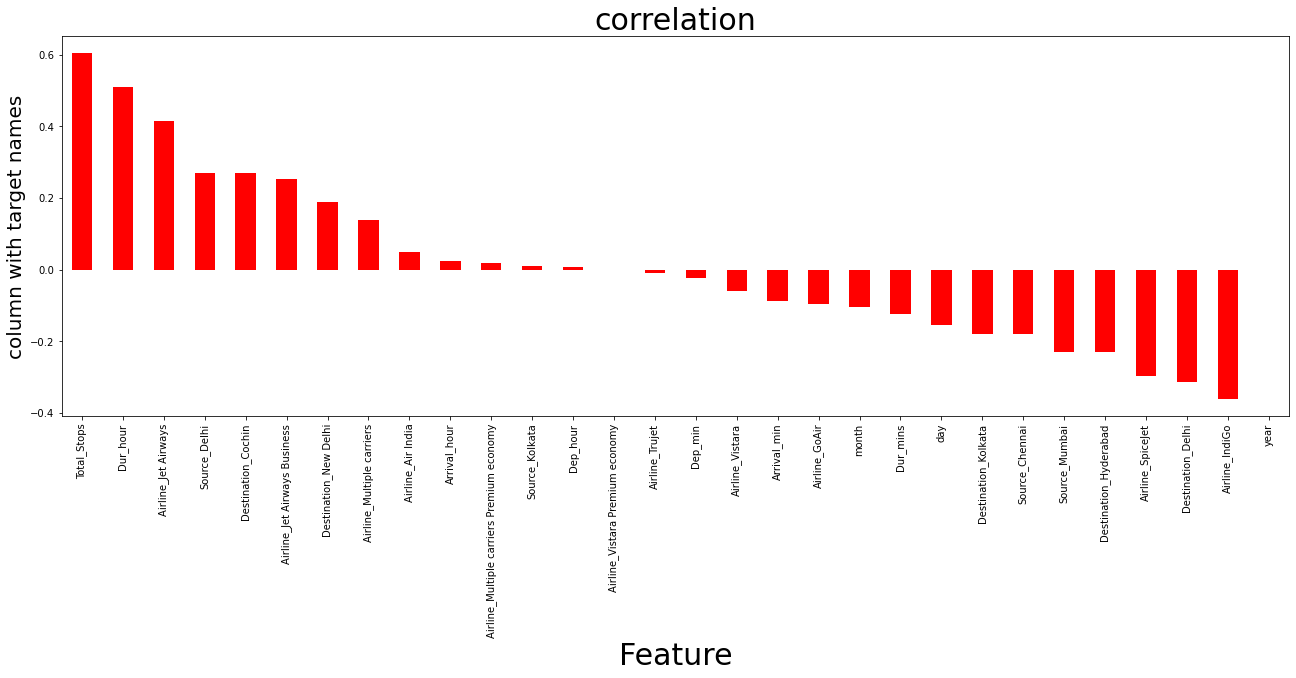

In [148]:
plt.figure(figsize=(22,7))
df1.corr()['Price'].sort_values(ascending=False).drop('Price').plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=20)
plt.title('correlation',fontsize=30)
plt.show()

The target variable is highly corrlated with number of stops and less correlated with the year

if we remove outliers we lose more than 30 percent if data so i am not removing outliers

### splitting the data as target and features

In [80]:
x = df1.drop('Price',axis=1)
y = df1['Price']

#### scaling the data

In [81]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [82]:
x.dtypes

Total_Stops                                  int64
day                                          int64
month                                        int64
Dep_hour                                     int64
Dep_min                                      int64
Arrival_hour                                 int64
Arrival_min                                  int64
Dur_hour                                     int64
Dur_mins                                     int64
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet                             uint8
Airline_Trujet                               uint8
Airline_Vistara                              uint8
Airline_Vistara Premium economy

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [85]:
model = [DecisionTreeRegressor(),ExtraTreesRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    for i in model:
        i.fit(x_train,y_train)
        pre =i.predict(x_test)
        r2_sc = r2_score(y_test,pre)
        print("R2 score corresponding to random state",r_state,"is",r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            model = i
                
print()
print()
print()
print()
print()
print()
print("max R2 score corresponding to random_state",final_state,"is",max_r2_score,"and model is",model)

R2 score corresponding to random state 40 is 0.7245400428114754
R2 score corresponding to random state 40 is 0.7818116735546335
R2 score corresponding to random state 40 is 0.5555484450885049
R2 score corresponding to random state 40 is 0.0693299247383492
R2 score corresponding to random state 40 is 0.6023137895724402
R2 score corresponding to random state 40 is 0.816891439800575
R2 score corresponding to random state 40 is 0.7626149642110093
R2 score corresponding to random state 41 is 0.6681498068652939
R2 score corresponding to random state 41 is 0.6472083213169699
R2 score corresponding to random state 41 is 0.6497743158541264
R2 score corresponding to random state 41 is 0.6688015550354386
R2 score corresponding to random state 41 is 0.6515488361887372
R2 score corresponding to random state 41 is 0.6619626018416588
R2 score corresponding to random state 41 is 0.6684279053454383
R2 score corresponding to random state 41 is 0.6675180761254789
R2 score corresponding to random state 41

R2 score corresponding to random state 42 is 0.7005203432042469
R2 score corresponding to random state 42 is 0.6893936994998702
R2 score corresponding to random state 42 is 0.698018639053613
R2 score corresponding to random state 42 is 0.6902990825491991
R2 score corresponding to random state 42 is 0.6915973277627179
R2 score corresponding to random state 42 is 0.7015720613200462
R2 score corresponding to random state 42 is 0.6937348219442965
R2 score corresponding to random state 42 is 0.6961425891955487
R2 score corresponding to random state 42 is 0.6984180779710767
R2 score corresponding to random state 42 is 0.6971180173707344
R2 score corresponding to random state 42 is 0.6939961138629518
R2 score corresponding to random state 42 is 0.6960713894365318
R2 score corresponding to random state 42 is 0.6902802774473302
R2 score corresponding to random state 42 is 0.6945211119979353
R2 score corresponding to random state 42 is 0.7014323112023368
R2 score corresponding to random state 42

R2 score corresponding to random state 43 is 0.7155089773225591
R2 score corresponding to random state 43 is 0.7059701815861013
R2 score corresponding to random state 43 is 0.7158744936838126
R2 score corresponding to random state 43 is 0.7025115092872077
R2 score corresponding to random state 43 is 0.7191769596667432
R2 score corresponding to random state 43 is 0.7076323762139121
R2 score corresponding to random state 43 is 0.7075225155535478
R2 score corresponding to random state 43 is 0.7028585526794957
R2 score corresponding to random state 43 is 0.7094707318841313
R2 score corresponding to random state 43 is 0.7080992616951527
R2 score corresponding to random state 43 is 0.7140429442365546
R2 score corresponding to random state 43 is 0.706856953683866
R2 score corresponding to random state 43 is 0.7150868917707449
R2 score corresponding to random state 43 is 0.7118263680713465
R2 score corresponding to random state 43 is 0.705745080118045
R2 score corresponding to random state 43 

R2 score corresponding to random state 44 is 0.654279614248449
R2 score corresponding to random state 44 is 0.6493211325796855
R2 score corresponding to random state 44 is 0.6795531856956392
R2 score corresponding to random state 44 is 0.6611993310807371
R2 score corresponding to random state 44 is 0.6556627068611033
R2 score corresponding to random state 44 is 0.654582703855598
R2 score corresponding to random state 44 is 0.6749110824200841
R2 score corresponding to random state 44 is 0.67782723855986
R2 score corresponding to random state 44 is 0.6740348429424108
R2 score corresponding to random state 44 is 0.6748458018660835
R2 score corresponding to random state 44 is 0.6785267808178701
R2 score corresponding to random state 44 is 0.6592946972844466
R2 score corresponding to random state 45 is 0.7057391650990144
R2 score corresponding to random state 45 is 0.7013676039356279
R2 score corresponding to random state 45 is 0.6998604526121526
R2 score corresponding to random state 45 is

R2 score corresponding to random state 46 is 0.7334817665527853
R2 score corresponding to random state 46 is 0.7180344306563041
R2 score corresponding to random state 46 is 0.7361615893361221
R2 score corresponding to random state 46 is 0.7206274641988446
R2 score corresponding to random state 46 is 0.7373860909741705
R2 score corresponding to random state 46 is 0.7278319473727646
R2 score corresponding to random state 46 is 0.7402594993254568
R2 score corresponding to random state 46 is 0.7396474325279709
R2 score corresponding to random state 46 is 0.7346594147876956
R2 score corresponding to random state 46 is 0.7186534621772447
R2 score corresponding to random state 46 is 0.7236859979103737
R2 score corresponding to random state 46 is 0.7259593703643739
R2 score corresponding to random state 46 is 0.7153164893100404
R2 score corresponding to random state 46 is 0.7342618455777755
R2 score corresponding to random state 46 is 0.7390756772009713
R2 score corresponding to random state 4

R2 score corresponding to random state 47 is 0.7174855776616054
R2 score corresponding to random state 47 is 0.6991552588514729
R2 score corresponding to random state 47 is 0.6988344899082575
R2 score corresponding to random state 47 is 0.6997329593883709
R2 score corresponding to random state 47 is 0.7225467173366051
R2 score corresponding to random state 47 is 0.7023002998909982
R2 score corresponding to random state 47 is 0.6971576575008749
R2 score corresponding to random state 47 is 0.7180969827315711
R2 score corresponding to random state 47 is 0.7015800505529529
R2 score corresponding to random state 47 is 0.7209408439460954
R2 score corresponding to random state 47 is 0.72151520924882
R2 score corresponding to random state 47 is 0.7220325649440271
R2 score corresponding to random state 47 is 0.721586310213047
R2 score corresponding to random state 47 is 0.7234980040802623
R2 score corresponding to random state 47 is 0.7221337406862213
R2 score corresponding to random state 47 i

R2 score corresponding to random state 48 is 0.6812486001206443
R2 score corresponding to random state 48 is 0.6882272505435936
R2 score corresponding to random state 48 is 0.6566240133580996
R2 score corresponding to random state 48 is 0.6654593691832082
R2 score corresponding to random state 48 is 0.6654413469780458
R2 score corresponding to random state 48 is 0.6732188466245452
R2 score corresponding to random state 48 is 0.6551542997091562
R2 score corresponding to random state 48 is 0.6608519997016145
R2 score corresponding to random state 48 is 0.6554564241898408
R2 score corresponding to random state 48 is 0.6900719157325261
R2 score corresponding to random state 48 is 0.6666805580247577
R2 score corresponding to random state 48 is 0.6703992139580524
R2 score corresponding to random state 48 is 0.647584504137831
R2 score corresponding to random state 48 is 0.6423346224827533
R2 score corresponding to random state 48 is 0.6504837795583343
R2 score corresponding to random state 48

R2 score corresponding to random state 50 is 0.7223194278939733
R2 score corresponding to random state 50 is 0.6977125929917194
R2 score corresponding to random state 50 is 0.7235533795172212
R2 score corresponding to random state 50 is 0.7320088041809255
R2 score corresponding to random state 50 is 0.7116207895419919
R2 score corresponding to random state 50 is 0.7063981130204131
R2 score corresponding to random state 50 is 0.7311427906253231
R2 score corresponding to random state 50 is 0.7036651162069356
R2 score corresponding to random state 50 is 0.7261999792105954
R2 score corresponding to random state 50 is 0.7223200797184927
R2 score corresponding to random state 50 is 0.7382360642384669
R2 score corresponding to random state 50 is 0.6876694623924728
R2 score corresponding to random state 50 is 0.7103587537269087
R2 score corresponding to random state 50 is 0.7068500936606931
R2 score corresponding to random state 50 is 0.7389531159857841
R2 score corresponding to random state 5

R2 score corresponding to random state 51 is 0.7233305294233128
R2 score corresponding to random state 51 is 0.7277611990890833
R2 score corresponding to random state 51 is 0.7237822458866678
R2 score corresponding to random state 51 is 0.7288919479184142
R2 score corresponding to random state 51 is 0.7238203538790231
R2 score corresponding to random state 51 is 0.725462312758368
R2 score corresponding to random state 51 is 0.7265437754445332
R2 score corresponding to random state 51 is 0.7263365256143491
R2 score corresponding to random state 51 is 0.7257637720018382
R2 score corresponding to random state 51 is 0.7207194892358437
R2 score corresponding to random state 51 is 0.7269077989591572
R2 score corresponding to random state 51 is 0.7297003176956974
R2 score corresponding to random state 51 is 0.7301444748128516
R2 score corresponding to random state 51 is 0.7247988699405128
R2 score corresponding to random state 51 is 0.7275768330164392
R2 score corresponding to random state 51

R2 score corresponding to random state 52 is 0.6215708690461272
R2 score corresponding to random state 52 is 0.6061743014282174
R2 score corresponding to random state 52 is 0.6114012930955204
R2 score corresponding to random state 52 is 0.6094955931748688
R2 score corresponding to random state 52 is 0.5906500518713272
R2 score corresponding to random state 52 is 0.6044795011122452
R2 score corresponding to random state 52 is 0.6184875847154878
R2 score corresponding to random state 52 is 0.6061235256625446
R2 score corresponding to random state 52 is 0.6031004367379127
R2 score corresponding to random state 52 is 0.6097537571066783
R2 score corresponding to random state 52 is 0.6210297454744585
R2 score corresponding to random state 52 is 0.5920687529478177
R2 score corresponding to random state 52 is 0.5893090743970059
R2 score corresponding to random state 52 is 0.5897467425426928
R2 score corresponding to random state 52 is 0.5980496720108608
R2 score corresponding to random state 5

R2 score corresponding to random state 54 is 0.7245307657508627
R2 score corresponding to random state 54 is 0.7281188685875587
R2 score corresponding to random state 54 is 0.7290835724917331
R2 score corresponding to random state 54 is 0.7330942215913617
R2 score corresponding to random state 54 is 0.7325317592479824
R2 score corresponding to random state 54 is 0.7263070423044055
R2 score corresponding to random state 54 is 0.7248223929281431
R2 score corresponding to random state 54 is 0.7203782741903026
R2 score corresponding to random state 54 is 0.7233595242595718
R2 score corresponding to random state 54 is 0.7278883906811602
R2 score corresponding to random state 54 is 0.7253164334041361
R2 score corresponding to random state 54 is 0.7291293989870635
R2 score corresponding to random state 54 is 0.7160181863314868
R2 score corresponding to random state 54 is 0.7274409744044503
R2 score corresponding to random state 54 is 0.7344242373065306
R2 score corresponding to random state 5

R2 score corresponding to random state 55 is 0.7215490698743874
R2 score corresponding to random state 55 is 0.7181768012093365
R2 score corresponding to random state 55 is 0.715486820164541
R2 score corresponding to random state 55 is 0.7139601160926239
R2 score corresponding to random state 55 is 0.7169928867160577
R2 score corresponding to random state 55 is 0.7207137481322474
R2 score corresponding to random state 55 is 0.7210961721230845
R2 score corresponding to random state 55 is 0.7172510852725514
R2 score corresponding to random state 55 is 0.7144637222826073
R2 score corresponding to random state 55 is 0.7159557528029241
R2 score corresponding to random state 55 is 0.7166882216545043
R2 score corresponding to random state 55 is 0.7164450333949016
R2 score corresponding to random state 55 is 0.7137959777042904
R2 score corresponding to random state 55 is 0.7179818468283966
R2 score corresponding to random state 55 is 0.7211468685767803
R2 score corresponding to random state 55

R2 score corresponding to random state 56 is 0.6976182365258486
R2 score corresponding to random state 56 is 0.705859209423741
R2 score corresponding to random state 56 is 0.7039140483114487
R2 score corresponding to random state 56 is 0.7094561531479495
R2 score corresponding to random state 56 is 0.7057368411820132
R2 score corresponding to random state 56 is 0.7004310957313361
R2 score corresponding to random state 56 is 0.704186698206194
R2 score corresponding to random state 56 is 0.7015067944117288
R2 score corresponding to random state 56 is 0.7041238605290374
R2 score corresponding to random state 56 is 0.7070576774766584
R2 score corresponding to random state 56 is 0.7013922763165292
R2 score corresponding to random state 56 is 0.7006150416402048
R2 score corresponding to random state 56 is 0.7026294090471206
R2 score corresponding to random state 56 is 0.7073888268097073
R2 score corresponding to random state 56 is 0.6968489888108951
R2 score corresponding to random state 56 

R2 score corresponding to random state 57 is 0.653007504990958
R2 score corresponding to random state 57 is 0.6534700920292812
R2 score corresponding to random state 57 is 0.655067214842868
R2 score corresponding to random state 57 is 0.6510278403431184
R2 score corresponding to random state 57 is 0.6563796699752246
R2 score corresponding to random state 57 is 0.6605585191096374
R2 score corresponding to random state 57 is 0.66156248484823
R2 score corresponding to random state 58 is 0.7392411980867162
R2 score corresponding to random state 58 is 0.7280505548921183
R2 score corresponding to random state 58 is 0.7088679515975195
R2 score corresponding to random state 58 is 0.7098117369948421
R2 score corresponding to random state 58 is 0.7414732283460157
R2 score corresponding to random state 58 is 0.719347629951598
R2 score corresponding to random state 58 is 0.7306963643993121
R2 score corresponding to random state 58 is 0.7261273365941701
R2 score corresponding to random state 58 is 

R2 score corresponding to random state 59 is 0.7258947794332249
R2 score corresponding to random state 59 is 0.720656474942151
R2 score corresponding to random state 59 is 0.7328288861614323
R2 score corresponding to random state 59 is 0.7285751056157574
R2 score corresponding to random state 59 is 0.7287151918232755
R2 score corresponding to random state 59 is 0.7241117656126976
R2 score corresponding to random state 59 is 0.722820270961119
R2 score corresponding to random state 59 is 0.7403866876050227
R2 score corresponding to random state 59 is 0.7397445483612544
R2 score corresponding to random state 59 is 0.7312567109767194
R2 score corresponding to random state 59 is 0.7090285497899584
R2 score corresponding to random state 59 is 0.7324881486182784
R2 score corresponding to random state 59 is 0.710607890521104
R2 score corresponding to random state 59 is 0.7175432815430973
R2 score corresponding to random state 59 is 0.7235445893456587
R2 score corresponding to random state 59 i

R2 score corresponding to random state 60 is 0.6659842812963739
R2 score corresponding to random state 60 is 0.6821617727939921
R2 score corresponding to random state 60 is 0.6754915532265422
R2 score corresponding to random state 60 is 0.6738227167530519
R2 score corresponding to random state 60 is 0.7071121115511727
R2 score corresponding to random state 60 is 0.7046810546210729
R2 score corresponding to random state 60 is 0.7015219321106315
R2 score corresponding to random state 60 is 0.6866707005255592
R2 score corresponding to random state 60 is 0.6802655390947576
R2 score corresponding to random state 60 is 0.6742025305492567
R2 score corresponding to random state 60 is 0.7110766432079736
R2 score corresponding to random state 60 is 0.6843277823820594
R2 score corresponding to random state 60 is 0.6878693420720328
R2 score corresponding to random state 60 is 0.6868196860573577
R2 score corresponding to random state 60 is 0.6615510311077873
R2 score corresponding to random state 6

R2 score corresponding to random state 61 is 0.6945061396513812
R2 score corresponding to random state 61 is 0.6901016792110097
R2 score corresponding to random state 61 is 0.6936800326853829
R2 score corresponding to random state 61 is 0.701617444703708
R2 score corresponding to random state 61 is 0.6916100964027976
R2 score corresponding to random state 61 is 0.6906455187857776
R2 score corresponding to random state 61 is 0.6952691261550197
R2 score corresponding to random state 61 is 0.6900531028113728
R2 score corresponding to random state 61 is 0.6915605434737522
R2 score corresponding to random state 61 is 0.694273422741147
R2 score corresponding to random state 61 is 0.687559696617859
R2 score corresponding to random state 61 is 0.6976746490554513
R2 score corresponding to random state 61 is 0.6849846369499368
R2 score corresponding to random state 61 is 0.6972520765459509
R2 score corresponding to random state 62 is 0.685932764243319
R2 score corresponding to random state 62 is

R2 score corresponding to random state 63 is 0.7044220742128731
R2 score corresponding to random state 63 is 0.7089495916233874
R2 score corresponding to random state 63 is 0.7027454848698975
R2 score corresponding to random state 63 is 0.6981163670716324
R2 score corresponding to random state 63 is 0.6975210370973439
R2 score corresponding to random state 63 is 0.7082849642105831
R2 score corresponding to random state 63 is 0.7030942663331788
R2 score corresponding to random state 63 is 0.7069112417148125
R2 score corresponding to random state 63 is 0.7005390547916908
R2 score corresponding to random state 63 is 0.7013872189730925
R2 score corresponding to random state 63 is 0.7037820691070228
R2 score corresponding to random state 63 is 0.6974998877875391
R2 score corresponding to random state 63 is 0.7140217731232594
R2 score corresponding to random state 63 is 0.6973265538548701
R2 score corresponding to random state 63 is 0.711112463456961
R2 score corresponding to random state 63

R2 score corresponding to random state 64 is 0.7262700924700962
R2 score corresponding to random state 64 is 0.7304618154464828
R2 score corresponding to random state 64 is 0.7170972653914098
R2 score corresponding to random state 64 is 0.7126512811368215
R2 score corresponding to random state 64 is 0.7299883929750499
R2 score corresponding to random state 64 is 0.7264895127178379
R2 score corresponding to random state 64 is 0.7298835760120342
R2 score corresponding to random state 64 is 0.7264877491070771
R2 score corresponding to random state 64 is 0.7244135614945502
R2 score corresponding to random state 64 is 0.7179763990584531
R2 score corresponding to random state 64 is 0.7139799055194342
R2 score corresponding to random state 64 is 0.7166310656786952
R2 score corresponding to random state 64 is 0.7293410172276682
R2 score corresponding to random state 64 is 0.7153339937653783
R2 score corresponding to random state 64 is 0.7206395251163175
R2 score corresponding to random state 6

R2 score corresponding to random state 67 is 0.7276525573900265
R2 score corresponding to random state 67 is 0.7244579278526093
R2 score corresponding to random state 67 is 0.6948110847749706
R2 score corresponding to random state 67 is 0.6897150728607915
R2 score corresponding to random state 67 is 0.729780261449956
R2 score corresponding to random state 67 is 0.6844724955879488
R2 score corresponding to random state 67 is 0.7248625840962115
R2 score corresponding to random state 67 is 0.7213284147755272
R2 score corresponding to random state 67 is 0.6870683803009316
R2 score corresponding to random state 67 is 0.7187545826126516
R2 score corresponding to random state 67 is 0.7314045632834479
R2 score corresponding to random state 67 is 0.7314108559081577
R2 score corresponding to random state 67 is 0.6909222364608409
R2 score corresponding to random state 67 is 0.7302599178669238
R2 score corresponding to random state 67 is 0.7280405861818328
R2 score corresponding to random state 67

R2 score corresponding to random state 68 is 0.6890214329279649
R2 score corresponding to random state 68 is 0.7109095446533373
R2 score corresponding to random state 68 is 0.7143529583671044
R2 score corresponding to random state 68 is 0.709832742078824
R2 score corresponding to random state 68 is 0.7121470725189454
R2 score corresponding to random state 68 is 0.6846995162755866
R2 score corresponding to random state 68 is 0.6854354983841513
R2 score corresponding to random state 68 is 0.6855856273528345
R2 score corresponding to random state 68 is 0.6945363992278578
R2 score corresponding to random state 68 is 0.6900775711049558
R2 score corresponding to random state 68 is 0.7145808431024593
R2 score corresponding to random state 68 is 0.6900228129233021
R2 score corresponding to random state 68 is 0.689120486894532
R2 score corresponding to random state 68 is 0.7137395049102824
R2 score corresponding to random state 68 is 0.7138038123224871
R2 score corresponding to random state 68 

R2 score corresponding to random state 69 is 0.736492067234046
R2 score corresponding to random state 69 is 0.7328045699016044
R2 score corresponding to random state 69 is 0.7264457274361087
R2 score corresponding to random state 69 is 0.7398415234547111
R2 score corresponding to random state 69 is 0.7272069262814327
R2 score corresponding to random state 69 is 0.7360487606732358
R2 score corresponding to random state 69 is 0.7308380804445411
R2 score corresponding to random state 69 is 0.7302501713730887
R2 score corresponding to random state 69 is 0.7354842960105689
R2 score corresponding to random state 69 is 0.730702030892125
R2 score corresponding to random state 69 is 0.7335765930136902
R2 score corresponding to random state 69 is 0.7355420919220869
R2 score corresponding to random state 69 is 0.729086461851008
R2 score corresponding to random state 69 is 0.7286261177695058
R2 score corresponding to random state 69 is 0.7266541475909603
R2 score corresponding to random state 69 i

R2 score corresponding to random state 70 is 0.7045564408716898
R2 score corresponding to random state 70 is 0.7030888848229625
R2 score corresponding to random state 70 is 0.7123799058676682
R2 score corresponding to random state 71 is 0.6540787573342233
R2 score corresponding to random state 71 is 0.6386487404977097
R2 score corresponding to random state 71 is 0.6510492227978939
R2 score corresponding to random state 71 is 0.6499110097259211
R2 score corresponding to random state 71 is 0.654202326348383
R2 score corresponding to random state 71 is 0.6397115076403288
R2 score corresponding to random state 71 is 0.6412313983590007
R2 score corresponding to random state 71 is 0.6464893278370294
R2 score corresponding to random state 71 is 0.6418486556859164
R2 score corresponding to random state 71 is 0.6498391303972321
R2 score corresponding to random state 71 is 0.6495737365399288
R2 score corresponding to random state 71 is 0.6621563086212673
R2 score corresponding to random state 71

R2 score corresponding to random state 72 is 0.693942657014383
R2 score corresponding to random state 72 is 0.6890774943159677
R2 score corresponding to random state 72 is 0.6829941663699624
R2 score corresponding to random state 72 is 0.6891367147156658
R2 score corresponding to random state 72 is 0.6958770114095305
R2 score corresponding to random state 72 is 0.689088093214721
R2 score corresponding to random state 72 is 0.6771227994312543
R2 score corresponding to random state 72 is 0.6787083399853298
R2 score corresponding to random state 72 is 0.6794680787106242
R2 score corresponding to random state 72 is 0.6746165549768661
R2 score corresponding to random state 72 is 0.6808512964444733
R2 score corresponding to random state 72 is 0.6908563389064194
R2 score corresponding to random state 72 is 0.6860344950097124
R2 score corresponding to random state 72 is 0.6800004227786034
R2 score corresponding to random state 72 is 0.6863136232874261
R2 score corresponding to random state 72 

R2 score corresponding to random state 73 is 0.6730938231605013
R2 score corresponding to random state 73 is 0.675710295551597
R2 score corresponding to random state 73 is 0.6622208633044617
R2 score corresponding to random state 73 is 0.6721239986113283
R2 score corresponding to random state 73 is 0.6744484478479598
R2 score corresponding to random state 73 is 0.674186269134835
R2 score corresponding to random state 73 is 0.6693627295732956
R2 score corresponding to random state 73 is 0.6640037309199771
R2 score corresponding to random state 73 is 0.6697932616460713
R2 score corresponding to random state 73 is 0.6825554222694139
R2 score corresponding to random state 73 is 0.6743399940869506
R2 score corresponding to random state 73 is 0.6828601071990872
R2 score corresponding to random state 73 is 0.6774471421731069
R2 score corresponding to random state 73 is 0.6751958334869008
R2 score corresponding to random state 73 is 0.683314219896398
R2 score corresponding to random state 73 i

R2 score corresponding to random state 74 is 0.7122556049803824
R2 score corresponding to random state 74 is 0.7024258420831311
R2 score corresponding to random state 74 is 0.6952321614856147
R2 score corresponding to random state 74 is 0.700536339693548
R2 score corresponding to random state 74 is 0.6968030306603572
R2 score corresponding to random state 74 is 0.6995823296141748
R2 score corresponding to random state 74 is 0.7055389628280625
R2 score corresponding to random state 74 is 0.6988486235932585
R2 score corresponding to random state 74 is 0.6981284643914847
R2 score corresponding to random state 75 is 0.7022767611109896
R2 score corresponding to random state 75 is 0.6891009763480191
R2 score corresponding to random state 75 is 0.7099400296939729
R2 score corresponding to random state 75 is 0.6861657103012319
R2 score corresponding to random state 75 is 0.7053807273558891
R2 score corresponding to random state 75 is 0.7130379949805818
R2 score corresponding to random state 75

R2 score corresponding to random state 76 is 0.6943310115134211
R2 score corresponding to random state 76 is 0.6951215844373732
R2 score corresponding to random state 76 is 0.6978414004623974
R2 score corresponding to random state 76 is 0.6962605003659912
R2 score corresponding to random state 76 is 0.6917346326768296
R2 score corresponding to random state 76 is 0.6829429695925053
R2 score corresponding to random state 76 is 0.6943391082414918
R2 score corresponding to random state 76 is 0.6958688929327653
R2 score corresponding to random state 76 is 0.6958230609393972
R2 score corresponding to random state 76 is 0.6919555309853545
R2 score corresponding to random state 76 is 0.6818798025882428
R2 score corresponding to random state 76 is 0.6898443417597404
R2 score corresponding to random state 76 is 0.7004794696422487
R2 score corresponding to random state 76 is 0.6849923161861637
R2 score corresponding to random state 76 is 0.6907729668842223
R2 score corresponding to random state 7

R2 score corresponding to random state 77 is 0.7266242649924212
R2 score corresponding to random state 77 is 0.7232759816972127
R2 score corresponding to random state 77 is 0.7201520251281295
R2 score corresponding to random state 77 is 0.7253271525258373
R2 score corresponding to random state 77 is 0.7287329936832816
R2 score corresponding to random state 77 is 0.725754179953674
R2 score corresponding to random state 77 is 0.7199393634524616
R2 score corresponding to random state 77 is 0.7202478438810227
R2 score corresponding to random state 77 is 0.719059467361058
R2 score corresponding to random state 77 is 0.7216736866878546
R2 score corresponding to random state 77 is 0.7197850178590499
R2 score corresponding to random state 77 is 0.7225675849643707
R2 score corresponding to random state 77 is 0.7242990116224064
R2 score corresponding to random state 77 is 0.7315880184141916
R2 score corresponding to random state 77 is 0.7216151492062737
R2 score corresponding to random state 77 

R2 score corresponding to random state 78 is 0.6854182683526671
R2 score corresponding to random state 78 is 0.6822738913595197
R2 score corresponding to random state 78 is 0.6794479016933914
R2 score corresponding to random state 78 is 0.6823775970031812
R2 score corresponding to random state 78 is 0.6858693220909402
R2 score corresponding to random state 78 is 0.6900376291004378
R2 score corresponding to random state 78 is 0.6776973097351543
R2 score corresponding to random state 78 is 0.6919690993721661
R2 score corresponding to random state 78 is 0.6893347740638961
R2 score corresponding to random state 78 is 0.6779336303778576
R2 score corresponding to random state 78 is 0.6873822855191032
R2 score corresponding to random state 78 is 0.6804224937299258
R2 score corresponding to random state 78 is 0.6820429907363346
R2 score corresponding to random state 78 is 0.6875306619028312
R2 score corresponding to random state 78 is 0.6903362222686957
R2 score corresponding to random state 7

R2 score corresponding to random state 80 is 0.734719764852122
R2 score corresponding to random state 80 is 0.7401836206399888
R2 score corresponding to random state 80 is 0.7496076687015453
R2 score corresponding to random state 80 is 0.7507038973855841
R2 score corresponding to random state 80 is 0.7459615988010039
R2 score corresponding to random state 80 is 0.7480163471077292
R2 score corresponding to random state 80 is 0.752424218102151
R2 score corresponding to random state 80 is 0.7319670474766843
R2 score corresponding to random state 80 is 0.729925629522344
R2 score corresponding to random state 80 is 0.736900861976334
R2 score corresponding to random state 80 is 0.7401466842221525
R2 score corresponding to random state 80 is 0.7446437980352821
R2 score corresponding to random state 80 is 0.7324711720358628
R2 score corresponding to random state 80 is 0.7349050062059448
R2 score corresponding to random state 80 is 0.7439730944673344
R2 score corresponding to random state 80 is

R2 score corresponding to random state 81 is 0.677695390524272
R2 score corresponding to random state 81 is 0.6782832826417435
R2 score corresponding to random state 81 is 0.6907274997750237
R2 score corresponding to random state 81 is 0.6775267598422636
R2 score corresponding to random state 81 is 0.6653830924578612
R2 score corresponding to random state 81 is 0.677448668641186
R2 score corresponding to random state 81 is 0.6917010128089784
R2 score corresponding to random state 81 is 0.6781077172883452
R2 score corresponding to random state 81 is 0.6587393454977671
R2 score corresponding to random state 81 is 0.678678055362036
R2 score corresponding to random state 81 is 0.6784321353923553
R2 score corresponding to random state 81 is 0.6931579849467351
R2 score corresponding to random state 81 is 0.6641004217019194
R2 score corresponding to random state 81 is 0.6582228152242695
R2 score corresponding to random state 81 is 0.6754150705859893
R2 score corresponding to random state 81 i

R2 score corresponding to random state 82 is 0.6600505518301029
R2 score corresponding to random state 82 is 0.6563836235633126
R2 score corresponding to random state 82 is 0.6516908946907926
R2 score corresponding to random state 82 is 0.6566767904990256
R2 score corresponding to random state 82 is 0.6591411444002051
R2 score corresponding to random state 82 is 0.6543732740923596
R2 score corresponding to random state 82 is 0.6571083967573025
R2 score corresponding to random state 82 is 0.665781855699251
R2 score corresponding to random state 82 is 0.6738953170778847
R2 score corresponding to random state 82 is 0.6674805389531456
R2 score corresponding to random state 82 is 0.6607074736937462
R2 score corresponding to random state 82 is 0.6484850372070348
R2 score corresponding to random state 82 is 0.6661753835240523
R2 score corresponding to random state 82 is 0.6560359010055192
R2 score corresponding to random state 82 is 0.6647589599469048
R2 score corresponding to random state 82

R2 score corresponding to random state 84 is 0.727749417485383
R2 score corresponding to random state 84 is 0.7219265242881082
R2 score corresponding to random state 84 is 0.7252878101742517
R2 score corresponding to random state 84 is 0.710410949792379
R2 score corresponding to random state 84 is 0.7240191106822076
R2 score corresponding to random state 84 is 0.7267970942043482
R2 score corresponding to random state 84 is 0.7405642165917175
R2 score corresponding to random state 84 is 0.7173959183598708
R2 score corresponding to random state 84 is 0.7212088139674148
R2 score corresponding to random state 84 is 0.7076554031158808
R2 score corresponding to random state 84 is 0.733170027628826
R2 score corresponding to random state 84 is 0.7233901129014912
R2 score corresponding to random state 84 is 0.7169172018556422
R2 score corresponding to random state 84 is 0.7340236487818735
R2 score corresponding to random state 84 is 0.7014979505882311
R2 score corresponding to random state 84 i

R2 score corresponding to random state 85 is 0.7089390801671042
R2 score corresponding to random state 85 is 0.7139024288300526
R2 score corresponding to random state 85 is 0.7155732224700848
R2 score corresponding to random state 85 is 0.7156243353482243
R2 score corresponding to random state 85 is 0.7110635857882893
R2 score corresponding to random state 85 is 0.7137612616529496
R2 score corresponding to random state 85 is 0.71587119867772
R2 score corresponding to random state 85 is 0.7215842457429356
R2 score corresponding to random state 85 is 0.7183023073494769
R2 score corresponding to random state 85 is 0.7085953860216776
R2 score corresponding to random state 85 is 0.7122229058489602
R2 score corresponding to random state 85 is 0.7110711432667263
R2 score corresponding to random state 85 is 0.7188510449419447
R2 score corresponding to random state 85 is 0.7226699414873088
R2 score corresponding to random state 85 is 0.7073419975731657
R2 score corresponding to random state 85 

R2 score corresponding to random state 86 is 0.6915962551220508
R2 score corresponding to random state 86 is 0.6955840351139739
R2 score corresponding to random state 86 is 0.695157248595151
R2 score corresponding to random state 86 is 0.7066590197185157
R2 score corresponding to random state 86 is 0.716685908031751
R2 score corresponding to random state 86 is 0.6982723634645838
R2 score corresponding to random state 86 is 0.7250852131301013
R2 score corresponding to random state 86 is 0.6863475966038939
R2 score corresponding to random state 86 is 0.7220395570414424
R2 score corresponding to random state 86 is 0.6857335295813367
R2 score corresponding to random state 86 is 0.693831940280722
R2 score corresponding to random state 86 is 0.7165551316104547
R2 score corresponding to random state 86 is 0.6906177404448315
R2 score corresponding to random state 86 is 0.6981817687190917
R2 score corresponding to random state 86 is 0.6985906213865585
R2 score corresponding to random state 86 i

R2 score corresponding to random state 88 is 0.7579641609773078
R2 score corresponding to random state 88 is 0.7515311279373861
R2 score corresponding to random state 88 is 0.722718950202432
R2 score corresponding to random state 88 is 0.7308891460519307
R2 score corresponding to random state 88 is 0.7310886321340114
R2 score corresponding to random state 88 is 0.7401497392758973
R2 score corresponding to random state 88 is 0.7416866417961387
R2 score corresponding to random state 88 is 0.7453284166742058
R2 score corresponding to random state 88 is 0.7539214297394601
R2 score corresponding to random state 88 is 0.7506392994912787
R2 score corresponding to random state 88 is 0.7542053901905466
R2 score corresponding to random state 88 is 0.7456089194996116
R2 score corresponding to random state 88 is 0.747126375171173
R2 score corresponding to random state 88 is 0.7351047235111856
R2 score corresponding to random state 88 is 0.7472966496612619
R2 score corresponding to random state 88 

R2 score corresponding to random state 89 is 0.7110215472107617
R2 score corresponding to random state 89 is 0.7428155586168237
R2 score corresponding to random state 89 is 0.7189433515624003
R2 score corresponding to random state 89 is 0.7450774713703253
R2 score corresponding to random state 89 is 0.7410641069533292
R2 score corresponding to random state 89 is 0.7264027517696676
R2 score corresponding to random state 89 is 0.7146736364745161
R2 score corresponding to random state 89 is 0.711369294355252
R2 score corresponding to random state 89 is 0.7113237484934727
R2 score corresponding to random state 89 is 0.738372953818202
R2 score corresponding to random state 89 is 0.7092445022504785
R2 score corresponding to random state 89 is 0.7370841254662339
R2 score corresponding to random state 89 is 0.7012270126928233
R2 score corresponding to random state 89 is 0.7375036141316822
R2 score corresponding to random state 89 is 0.7385985791782834
R2 score corresponding to random state 89 

max R2 score corresponding to random_state 40 is 0.8129041204808491 and model is RandomForestRegressor()

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=40)
rf = RandomForestRegressor()


In [89]:
parameters={'criterion':['mse','mae']}


In [90]:
gcv=GridSearchCV(rf,parameters,cv=10)
gcv.fit(x,y)


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae']})

In [91]:
gcv.best_params_

{'criterion': 'mae'}

In [92]:
rf =RandomForestRegressor( criterion = 'mae')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
r2_sc = r2_score(y_test,pred)
print("R2 score :",r2_sc*100)

R2 score : 77.53546078673891


In [94]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 1215.7419739081113
MSE: 5088075.866205956
RMSE: 2255.6763655732966


Text(0, 0.5, 'prediction')

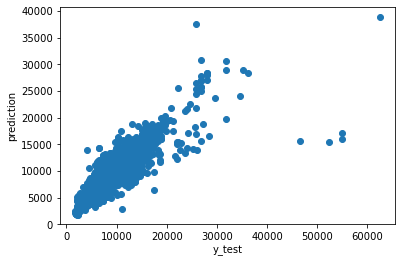

In [95]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('y_test')
plt.ylabel('prediction')

we obtained the straight line so it is good model

In [182]:
df2.shape

(2671, 29)

In [183]:
pred=rf.predict(df2)

In [184]:
pred

array([13537.22 , 12249.555,  5352.11 , ..., 36425.03 , 14529.52 ,
        9046.14 ])

## saving the model

In [185]:
import joblib
joblib.dump(rf,'insurence.pkl')

['insurence.pkl']

## Loading the saved model

In [186]:
model = joblib.load('insurence.pkl')

In [187]:
prediction = model.predict(df2)

In [189]:
prediction= pd.DataFrame(prediction)

In [190]:
prediction.to_csv('Result.csv')

# Conclusion